In [1]:
import numpy as np
import pandas as pd
import matplotlib.lines as mlines
from matplotlib import pyplot as plt

In [2]:
final_table = pd.DataFrame([
    {'acc': 1.0, 'model': 'VGG-CTC', 'dataset': 'iam', 'speed_inference': 272.515824,},
    {'acc': 5.3, 'model': 'VGG-CTC', 'dataset': 'peter', 'speed_inference': 203.846424},
    {'acc': 15.9, 'model': 'VGG-CTC', 'dataset': 'bentham', 'speed_inference': 218.482933},
    ####
    {'acc': 4.1, 'model': 'RCNN-CTC', 'dataset': 'iam', 'speed_inference': 241.852117},
    {'acc': 9.0, 'model': 'RCNN-CTC', 'dataset': 'peter', 'speed_inference': 182.838906},
    {'acc': 28.8, 'model': 'RCNN-CTC', 'dataset': 'bentham', 'speed_inference': 176.607570},
    ####
    {'acc': 12.9, 'model': 'Rosetta', 'dataset': 'iam', 'speed_inference': 179.963847},
    {'acc': 16.4, 'model': 'Rosetta', 'dataset': 'peter', 'speed_inference': 167.271335},
    {'acc': 37.6, 'model': 'Rosetta', 'dataset': 'bentham', 'speed_inference': 161.181829},
    ####
    {'acc': 14.7, 'model': 'CRNN', 'dataset': 'iam', 'speed_inference': 254.111705},
    {'acc': 23.2, 'model': 'CRNN', 'dataset': 'peter', 'speed_inference': 192.594495},
    {'acc': 20.8, 'model': 'CRNN', 'dataset': 'bentham', 'speed_inference': 190.548417},
    ####
    {'acc': 18.3, 'model': 'GRCNN', 'dataset': 'iam', 'speed_inference': 204.831117},
    {'acc': 26.2, 'model': 'GRCNN', 'dataset': 'peter', 'speed_inference': 179.965100},
    {'acc': 38.5, 'model': 'GRCNN', 'dataset': 'bentham', 'speed_inference': 168.052223},
    ####
    {'acc': 19.3, 'model': 'ResNet-BiLSTM-CTC', 'dataset': 'iam', 'speed_inference': 147.478519},
    {'acc': 10.5, 'model': 'ResNet-BiLSTM-CTC', 'dataset': 'peter', 'speed_inference': 148.298829},
    {'acc': 38.1, 'model': 'ResNet-BiLSTM-CTC', 'dataset': 'bentham', 'speed_inference': 137.171413},
    ####
    {'acc': 19.8, 'model': 'STAR-Net', 'dataset': 'iam', 'speed_inference': 128.770767},
    {'acc': 0.6, 'model': 'STAR-Net', 'dataset': 'peter', 'speed_inference': 129.288572},
    {'acc': 1.4, 'model': 'STAR-Net', 'dataset': 'bentham', 'speed_inference': 117.991797},
    ####
    {'acc': 1.0, 'model': 'R2AM', 'dataset': 'iam', 'speed_inference': 38.619183},
    {'acc': 10.0, 'model': 'R2AM', 'dataset': 'peter', 'speed_inference': 35.876883},
    {'acc': 27.6, 'model': 'R2AM', 'dataset': 'bentham', 'speed_inference': 36.921239},
])

final_table['params'] = final_table['model'].map({
    'VGG-CTC': 1401585,
    'RCNN-CTC': 484401,
    'Rosetta': 11085121,
    'CRNN': 3769585,
    'GRCNN': 2852401,
    'ResNet-BiLSTM-CTC': 13453121,
    'STAR-Net': 15146665,
    'R2AM': 1193778,
}) 
final_table

,acc,model,dataset,speed_inference,params
0,1.0,VGG-CTC,iam,272.515824,1401585
1,5.3,VGG-CTC,peter,203.846424,1401585
2,15.9,VGG-CTC,bentham,218.482933,1401585
3,4.1,RCNN-CTC,iam,241.852117,484401
4,9.0,RCNN-CTC,peter,182.838906,484401
5,28.8,RCNN-CTC,bentham,176.607570,484401
6,12.9,Rosetta,iam,179.963847,11085121
7,16.4,Rosetta,peter,167.271335,11085121
8,37.6,Rosetta,bentham,161.181829,11085121
9,14.7,CRNN,iam,254.111705,3769585


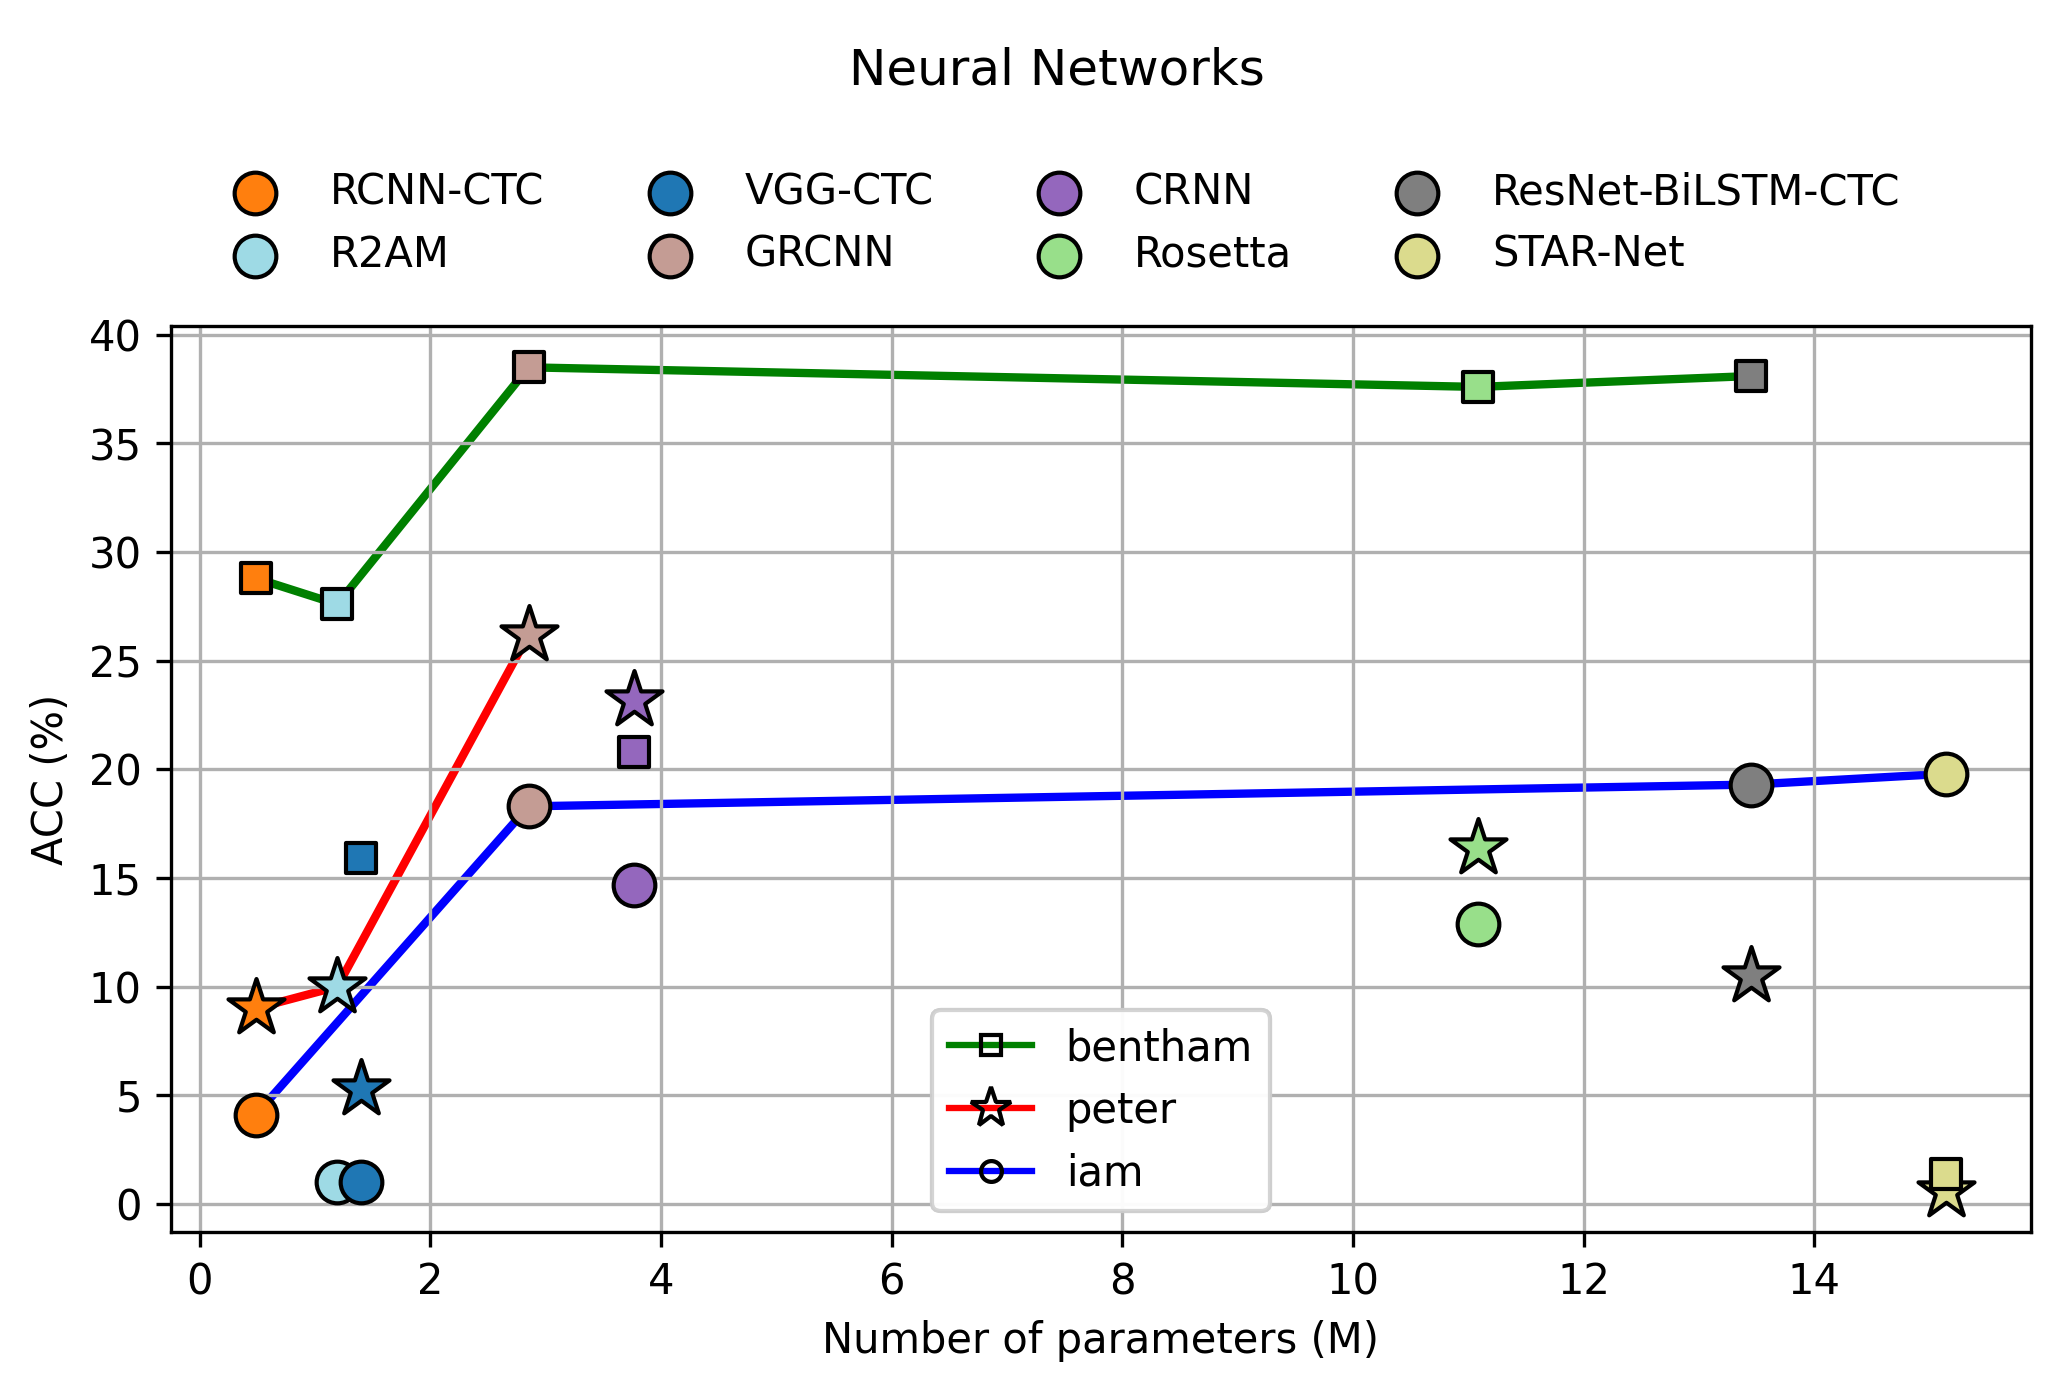

In [3]:
line_colors = {
    'peter': 'red',
    'iam': 'blue',
    'bentham': 'green',
}
nets = final_table['model'].unique()
net_cmap = plt.cm.get_cmap('tab20', len(nets))
net_info = {k: {
                  'color': net_cmap(i),
                  'markers':['o', '*', 's', 'p', 'h']
              } for i, k in enumerate(nets)}
marker_area = {
    'o': 100,
    '*': 200,
    's': 50,
    'p': 100,
    'h': 100,
}

# XLABEL = 'Time (ms/image)'
XLABEL = 'Number of parameters (M)'

def create_items(df):
    models = df['model'].values
    datasets = df['dataset'].values
#     x_values = (1/df['speed_inference'].values)
    x_values = df['params'].values / 10**6
    y_values = df['acc'].values

    items = []

    for i, (m, x, y, d) in enumerate(zip(models, x_values, y_values, datasets)):
        info = {}
        for net in nets:
            if net == m:
                info = net_info[net]
                
        marker = info['markers'].pop(0)
        item = {
            'name': d,
            'label': m,
            'x': x,
            'y': y,
            'color': info['color'],
            'size': marker_area[marker],
            'marker': marker, 
        }
        items.append(item)
    
    return items

def plot_graph(items):
    
    fig, ax = plt.subplots(figsize=(8, 4), dpi=300)
    ax.grid(True)
    
    found_labels = []
    for dataset in ['iam','peter', 'bentham']:
        x_points = []
        y_points = []
        selected_items  = [it for it in items if dataset == it['name']]
        selected_items = sorted(selected_items, key=lambda x: x['x'])
        for item in selected_items:
            label = item['label']
            
            if label in found_labels:
                label = None
            else:
                found_labels.append(label)

            ax.scatter(item['x'], item['y'], 
                      marker = item['marker'],
                      color = item['color'],
                      s = item['size'],
                      label = label,
                      linewidths = 1,
                      edgecolors = 'black',
                      zorder=2
                      )
        
            if not y_points or item['y'] > y_points[-1]*0.9:
                x_points.append(item['x'])
                y_points.append(item['y'])
    
                
        z = [(x, y) for x, y in sorted(zip(x_points, y_points), key=lambda x: x[0])]
        x = [i[0] for i in z]
        y = [i[1] for i in z]

        plt.plot(x, y, line_colors[dataset], linewidth=2, zorder=1)

    
    ax.set_xlabel(XLABEL)
    ax.set_ylabel('ACC (%)')

    red_star = mlines.Line2D(
        [], [], color='red', markerfacecolor='none', marker='*', linestyle='-',
        markeredgecolor='black', markersize=10, label='peter'
    )
    green_square = mlines.Line2D(
        [], [], color='green',markerfacecolor='none', marker='s', linestyle='-',
        markeredgecolor='black', markersize=5, label='bentham'
    )
    blue_circle = mlines.Line2D(
        [], [], color='blue',markerfacecolor='none', marker='o', linestyle='-',
        markeredgecolor='black', markersize=5, label='iam'
    )

    leg1 = plt.legend(bbox_to_anchor=(0.95, 1.35), 
#               handles=[green_square, red_star, blue_circle],
              ncol=4,
              scatterpoints=1,
              facecolor = 'white', 
              edgecolor = 'white',
              title = 'Neural Networks\n',
              title_fontsize = '12',
              fontsize='10'
    )
    


    plt.gca().add_artist(leg1)
    plt.gca().add_artist(ax.legend(handles=[green_square, red_star, blue_circle]))

    return fig, ax


items = create_items(final_table)
fig, ax = plot_graph(items)